In [9]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import calc_params
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")
import seaborn as sns

In [1]:
cd ..

/Users/lisawink/Documents/freiburg


In [3]:
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuSA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','BuOri_mean', 'BuSqC_wmean','BuFra_3D_wmean', 'StrClo400_median']

In [4]:
def corr_matrix(params, radius):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
    vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
    vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

In [5]:
radius = 200

<Axes: xlabel='BuSqC_wmean', ylabel='BuFra_3D_wmean'>

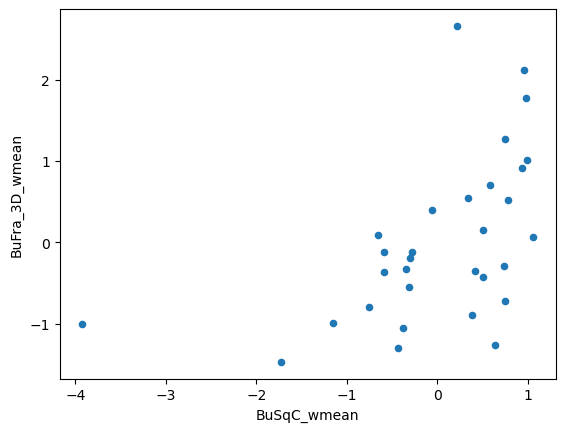

In [14]:
vars[['BuSqC_wmean','BuFra_3D_wmean']].plot(x='BuSqC_wmean',y='BuFra_3D_wmean',kind='scatter')

<Axes: xlabel='BuIBD', ylabel='BuAdj'>

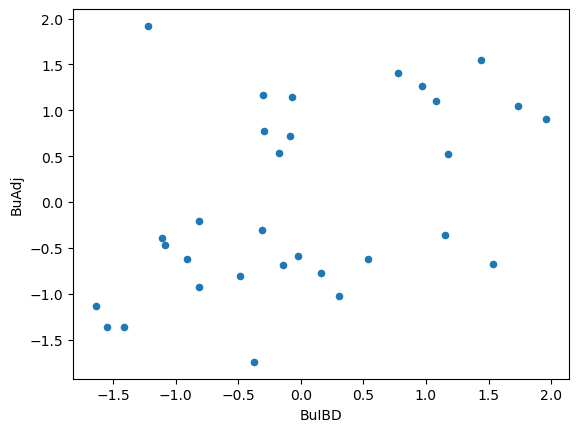

In [15]:
vars[['BuIBD',	'BuAdj']].plot(x='BuIBD',y='BuAdj',kind='scatter')

<Axes: xlabel='BuSqC_wmean', ylabel='BuAdj'>

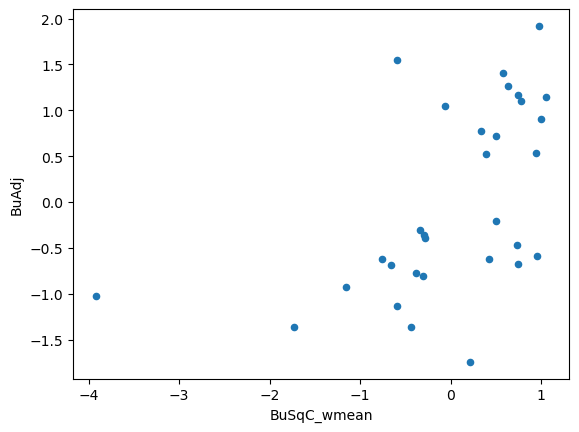

In [17]:
vars[['BuSqC_wmean',	'BuAdj']].plot(x='BuSqC_wmean',y='BuAdj',kind='scatter')

<Axes: xlabel='BuHt_wmean', ylabel='StrHW_median'>

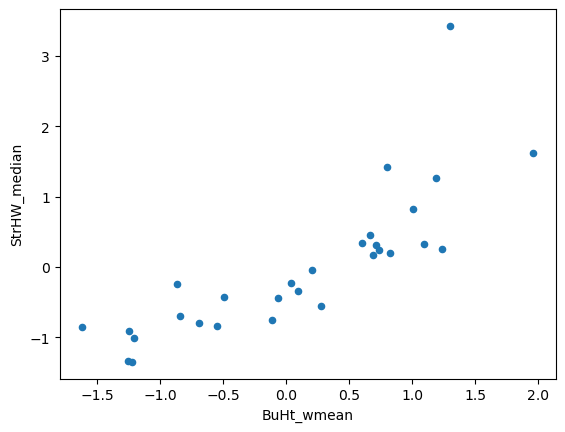

In [16]:
vars[['BuHt_wmean',	'StrHW_median']].plot(x='BuHt_wmean',y='StrHW_median',kind='scatter')

In [12]:
vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
vars.index = vars['station_id']
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
vars = vars.drop(to_remove, axis=1)

scaler = StandardScaler()
vars_scaled = scaler.fit_transform(vars)
vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

# make column negative
vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
vars['BuIBD'] = -vars['BuIBD']
vars['BuAdj'] = -vars['BuAdj']

# cross correlation matrix of parameters
corr_s = vars[params].corr(method='spearman')

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [18]:
corr_t = vars[params].T.corr(method='spearman')

<Axes: xlabel='station_id', ylabel='station_id'>

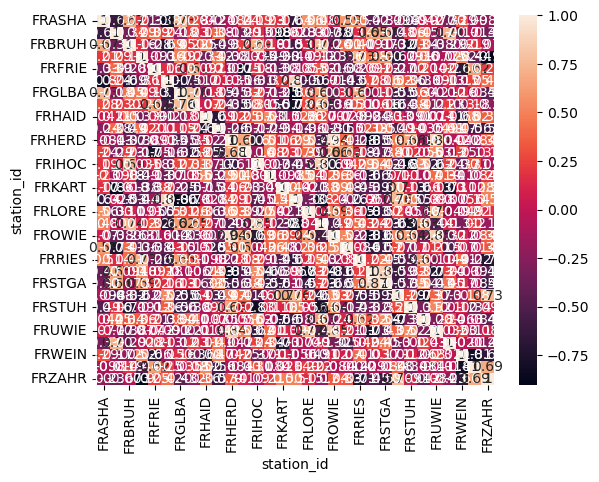

In [20]:
# plot heatmap of correlation matrix
sns.heatmap(corr_t, annot=True)

[Text(0, 0, 'BuAre_sum'),
 Text(1, 0, 'BuVol_3D_sum'),
 Text(2, 0, 'BuSA_3D_sum'),
 Text(3, 0, 'BuIBD'),
 Text(4, 0, 'BuAdj'),
 Text(5, 0, 'BuSWR_3D_median'),
 Text(6, 0, 'BuHt_wmean'),
 Text(7, 0, 'StrHW_median'),
 Text(8, 0, 'BuOri_mean'),
 Text(9, 0, 'BuSqC_wmean'),
 Text(10, 0, 'BuFra_3D_wmean'),
 Text(11, 0, 'StrClo400_median')]

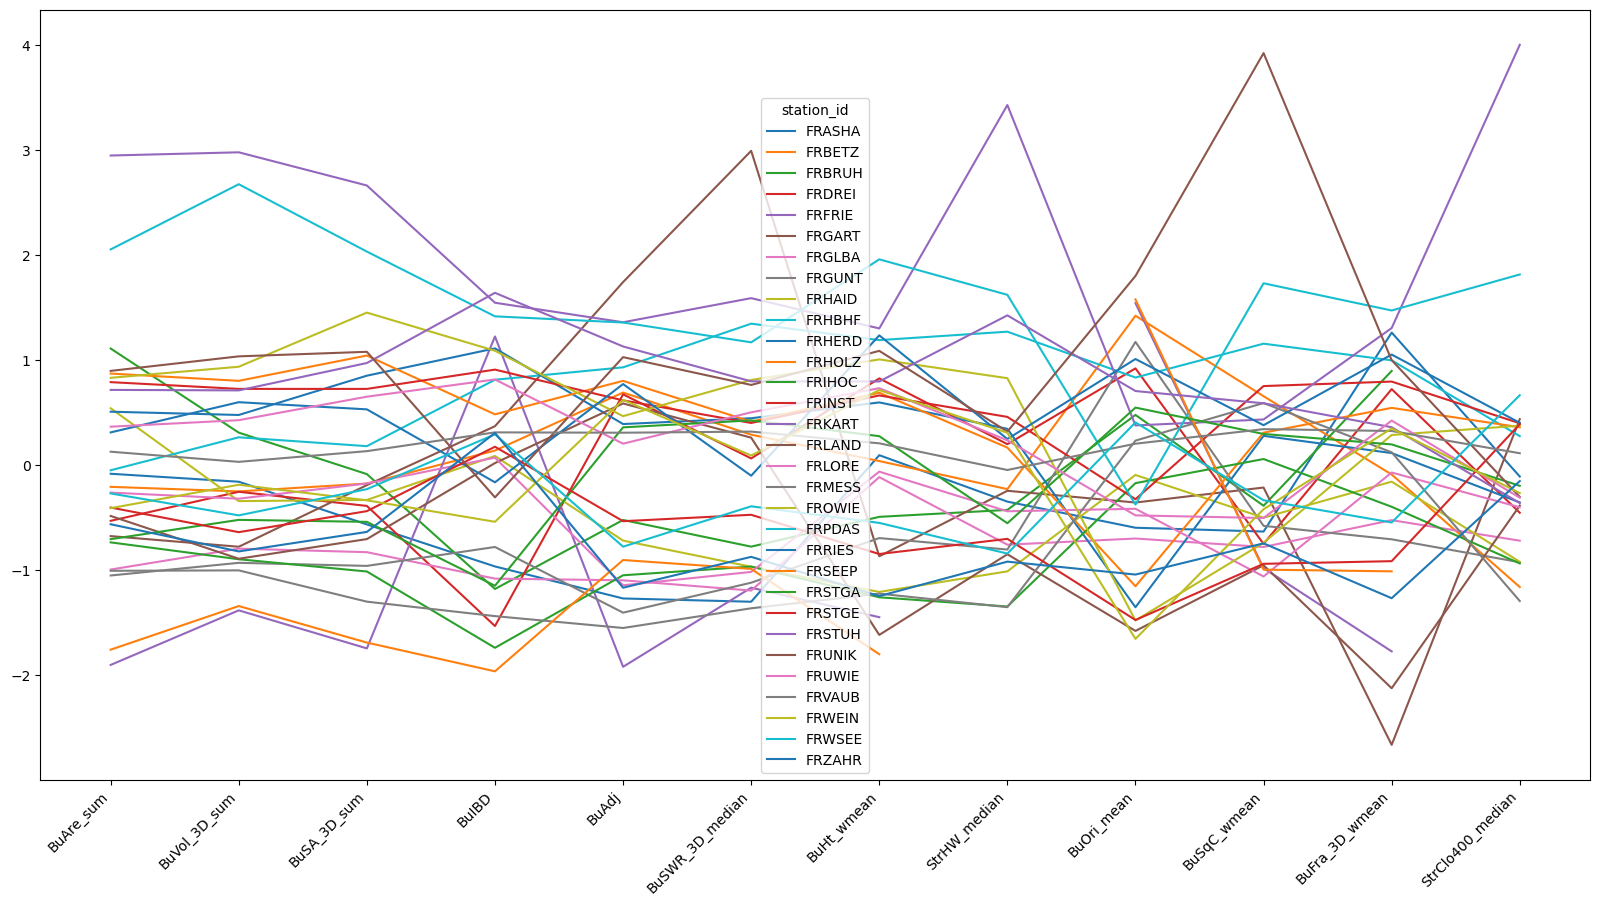

In [28]:
# show all x labels
ax = vars[params].T.plot(figsize=(20,10))
#plt.gca().set_xticklabels(vars.index.astype(str).values)
ax.set_xticks(range(len(vars[params].T)))  # This works if the index is numerical
ax.set_xticklabels(vars[params].T.index, rotation=45, ha='right')  # Ensure correct labels are used

In [25]:
vars[params]

BuAre_sum  BuVol_3D_sum  BuSA_3D_sum     BuIBD     BuAdj  \
station_id                                                             
FRASHA      -0.081816     -0.157665    -0.564225 -0.964411 -1.269277   
FRBETZ      -0.206408     -0.249937    -0.175132  0.139061  0.691481   
FRBRUH       1.110476      0.309665    -0.085113 -1.178946 -0.521952   
FRDREI      -0.529935     -0.253377    -0.387989 -1.531954  0.674504   
FRFRIE      -1.902023     -1.382498    -1.744703  1.225465 -1.920009   
FRGART      -0.675534     -0.776873    -0.190070  0.371000  1.743349   
FRGLBA      -0.993940     -0.794833    -0.828421 -1.080394 -1.096298   
FRGUNT      -1.050535     -0.929971    -0.959149 -0.779062 -1.404465   
FRHAID       0.541906     -0.342353    -0.330964  0.087396 -0.718373   
FRHBHF      -0.048440      0.265365     0.180988  0.813268  0.931618   
FRHERD       0.509095      0.477978     0.852031  1.112044  0.391494   
FRHOLZ       0.872349      0.803073     1.044078  0.483797  0.802863   
FRIHOC      -0.735154     -0.895910    -1.012541 -1.739030 -1.048493   
FRINST       0.790606      0.726237     0.726193  0.909888  0.616879   
FRKART       2.948448      2.979079     2.663100  1.546569  1.360765   
FRLAND      -0.483698     -0.890911    -0.703841  0.020134  0.587511   
FRLORE      -0.260994     -0.319333    -0.174190  0.071191 -1.143568   
FRMESS      -1.005758     -1.001944    -1.299753 -1.437431 -1.550275   
FROWIE       0.831833      0.937326     1.452715  1.089208  0.466658   
FRPDAS       2.054530      2.675230     2.033838  1.417120  1.358552   
FRRIES       0.312002      0.599602     0.531442 -0.163046  0.772280   
FRSEEP      -1.756794     -1.341494    -1.689387 -1.963059 -0.903240   
FRSTGA      -0.704420     -0.520854    -0.539831 -1.148081  0.360018   
FRSTGE      -0.403344     -0.637931    -0.437766  0.175484 -0.533506   
FRSTUH       0.716689      0.712028     0.972596  1.641074  1.130297   
FRUNIK       0.897691      1.036083     1.079475 -0.306560  1.028621   
FRUWIE       0.366366      0.428388     0.651935  0.815895  0.204582   
FRVAUB       0.128164      0.031588     0.133506  0.312261  0.309061   
FRWEIN      -0.409523     -0.186513    -0.334853 -0.539069  0.621913   
FRWSEE      -0.269223     -0.477907    -0.228385  0.293423 -0.776144   
FRZAHR      -0.562615     -0.821340    -0.635582  0.306762 -1.166847   

            BuSWR_3D_median  BuHt_wmean  StrHW_median  BuOri_mean  \
station_id                                                          
FRASHA            -1.300411    0.094994     -0.347110   -0.595785   
FRBETZ             0.290427    0.039086     -0.228121    1.422865   
FRBRUH            -0.775831   -0.492080     -0.426024    0.478362   
FRDREI             0.064112    0.826018      0.200092    0.921557   
FRFRIE            -1.166693   -1.447660           NaN    1.542103   
FRGART             2.992958   -0.867526     -0.243962   -0.355701   
FRGLBA            -1.194080   -0.114015     -0.757281   -0.698548   
FRGUNT            -1.119066   -0.694129     -0.803633    1.173282   
FRHAID            -0.967309   -1.207190     -1.011118   -0.093357   
FRHBHF             1.347291    1.190619      1.271100    0.834358   
FRHERD             0.446863    0.597456      0.345940   -1.352654   
FRHOLZ             0.414635    0.689686      0.167462   -1.153061   
FRIHOC            -0.965572   -1.257945     -1.345935   -0.171076   
FRINST             0.401854    0.663906      0.459665   -0.324267   
FRKART             1.590387    1.301980      3.429004    0.378288   
FRLAND             0.262015   -1.616190     -0.848274   -1.578282   
FRLORE            -1.016629   -0.061782     -0.439088   -0.415209   
FRMESS            -1.362891   -1.223334     -1.352043    0.233787   
FROWIE             0.810720    1.007020      0.828147   -1.479085   
FRPDAS             1.169538    1.959801      1.622148   -0.375035   
FRRIES            -0.100405    1.235935      0.248961    1.010694   
FRSEEP            -0.987813   -1.800081         

In [29]:
def corr_matrix_station(params, radius):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
    vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
    vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

    # cross correlation matrix of parameters
    corr_s = vars[params].T.corr(method='spearman')

    # color bar keyword arguments
    cbar_kws = {"shrink":1,
                'extend':'min', 
                'extendfrac':.1,  
                'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
                'label': 'Spearman Correlation'}

    g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='coolwarm', figsize=(10,10), cbar_pos=(.1, .37, .03, .2),linewidths=.25, cbar_kws=cbar_kws)
    g.ax_row_dendrogram.remove()
    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    plt.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.savefig('/Users/lisawink/Documents/paper1/figures/clustermap_spearman_'+str(radius)+'.png', dpi=300)

    plt.show()
    
    # show all x labels
    ax = vars[params].T.plot(figsize=(20,10))
    #plt.gca().set_xticklabels(vars.index.astype(str).values)
    ax.set_xticks(range(len(vars[params].T)))  # This works if the index is numerical
    ax.set_xticklabels(vars[params].T.index, rotation=45, ha='right')  # Ensure correct labels are used

In [104]:
import seaborn as sns

In [110]:
def corr_matrix(params, radius):

    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
    vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
    vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

    # cross correlation matrix of parameters
    corr_s = vars[params].corr(method='spearman')

    # color bar keyword arguments
    cbar_kws = {"shrink":1,
                'extend':'min', 
                'extendfrac':.1,  
                'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
                'label': 'Spearman Correlation'}

    g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='coolwarm', figsize=(10,10), cbar_pos=(.1, .37, .03, .2),linewidths=.25, cbar_kws=cbar_kws)
    g.ax_row_dendrogram.remove()
    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    #plt.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.savefig('/Users/lisawink/Documents/paper1/figures/clustermap_spearman_'+str(radius)+'.svg', dpi=300)

    #ax=vars[params].plot(figsize=(20,10))
    #ax.set_xticks(range(len(vars[params])))  # This works if the index is numerical
    #ax.set_xticklabels(vars[params].index, rotation=45, ha='right')  # Ensure correct labels are used

In [111]:
sns.reset_orig

<function seaborn.rcmod.reset_orig()>

In [77]:
params = ['BuOri_mean', 'BuIBD','StrClo400_median', 'BuSqC_wmean','BuFra_3D_wmean', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median', 'BuAre_sum', 'BuVol_3D_sum', 'BuSA_3D_sum']

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


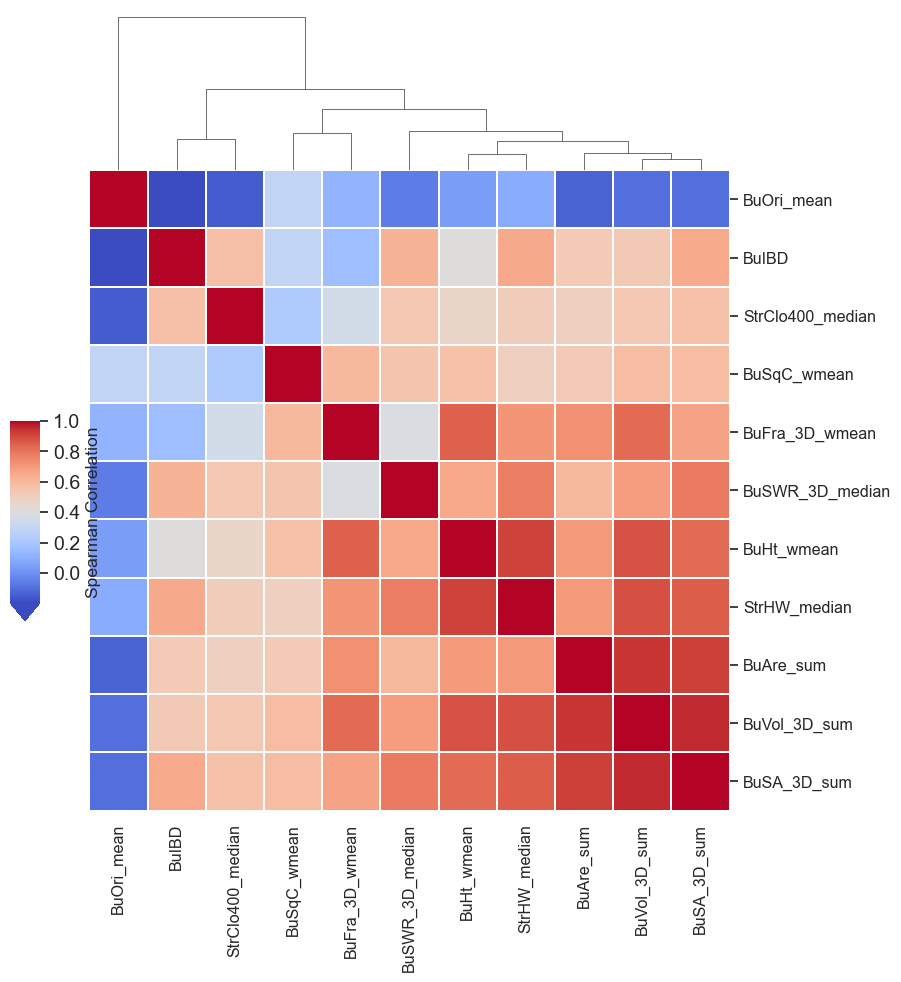

In [112]:
corr_matrix(params, 200)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


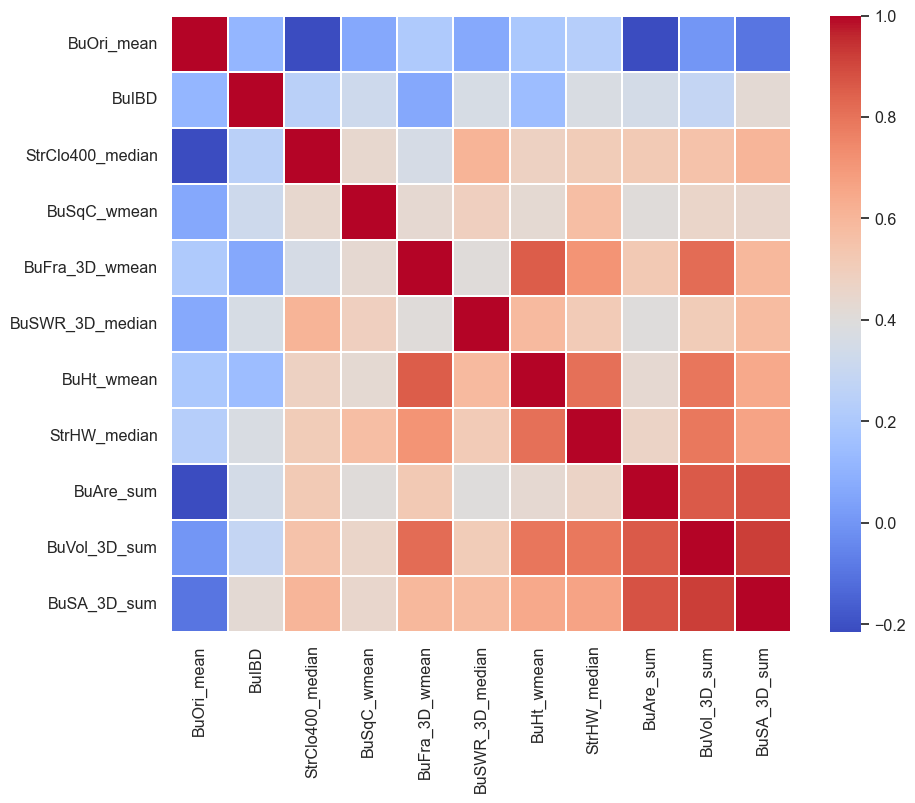

In [114]:
corr_matrix_order(params, 100)

In [95]:
def corr_matrix_order(params, radius):

    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
    vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
    vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

    # cross correlation matrix of parameters
    corr_s = vars[params].corr(method='spearman')

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_s, cmap='coolwarm',linewidths=.25)
    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    #ax.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.savefig('/Users/lisawink/Documents/paper1/figures/heatmap_spearman_'+str(radius)+'.svg', dpi=300)


/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/skle

[]

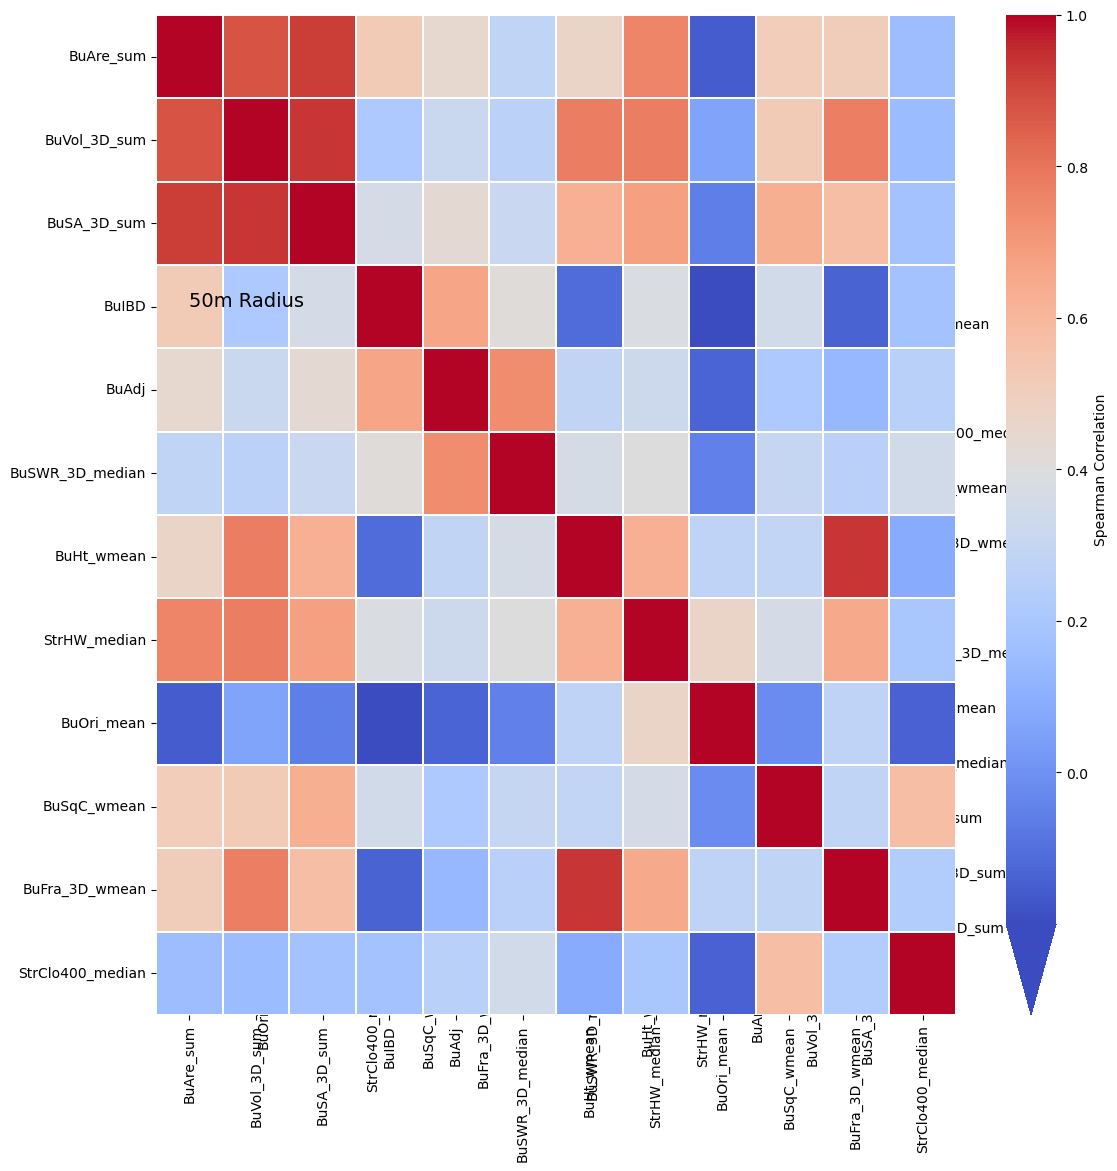

In [60]:
radius = 200

vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
vars.index = vars['station_id']
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
vars = vars.drop(to_remove, axis=1)

scaler = StandardScaler()
vars_scaled = scaler.fit_transform(vars)
vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

# make column negative
vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
vars['BuIBD'] = -vars['BuIBD']
vars['BuAdj'] = -vars['BuAdj']

# cross correlation matrix of parameters
corr_s = vars[params].corr(method='spearman')

# color bar keyword arguments
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1,  
            'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
            'label': 'Spearman Correlation'}

g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='coolwarm', figsize=(10,10), cbar_pos=(.1, .37, .03, .2),linewidths=.25, cbar_kws=cbar_kws)
g.ax_row_dendrogram.remove()
#plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
plt.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
g.figure.set_constrained_layout_pads(w_pad=1, h_pad=0.1, wspace=1, hspace=0.1)

ax = g.figure.add_axes([0.1, 0.1, 1, 1])
corr_matrix_order(params, 50, ax = ax)
plt.plot()

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/skle

TypeError: seaborn.matrix.heatmap() got multiple values for keyword argument 'ax'

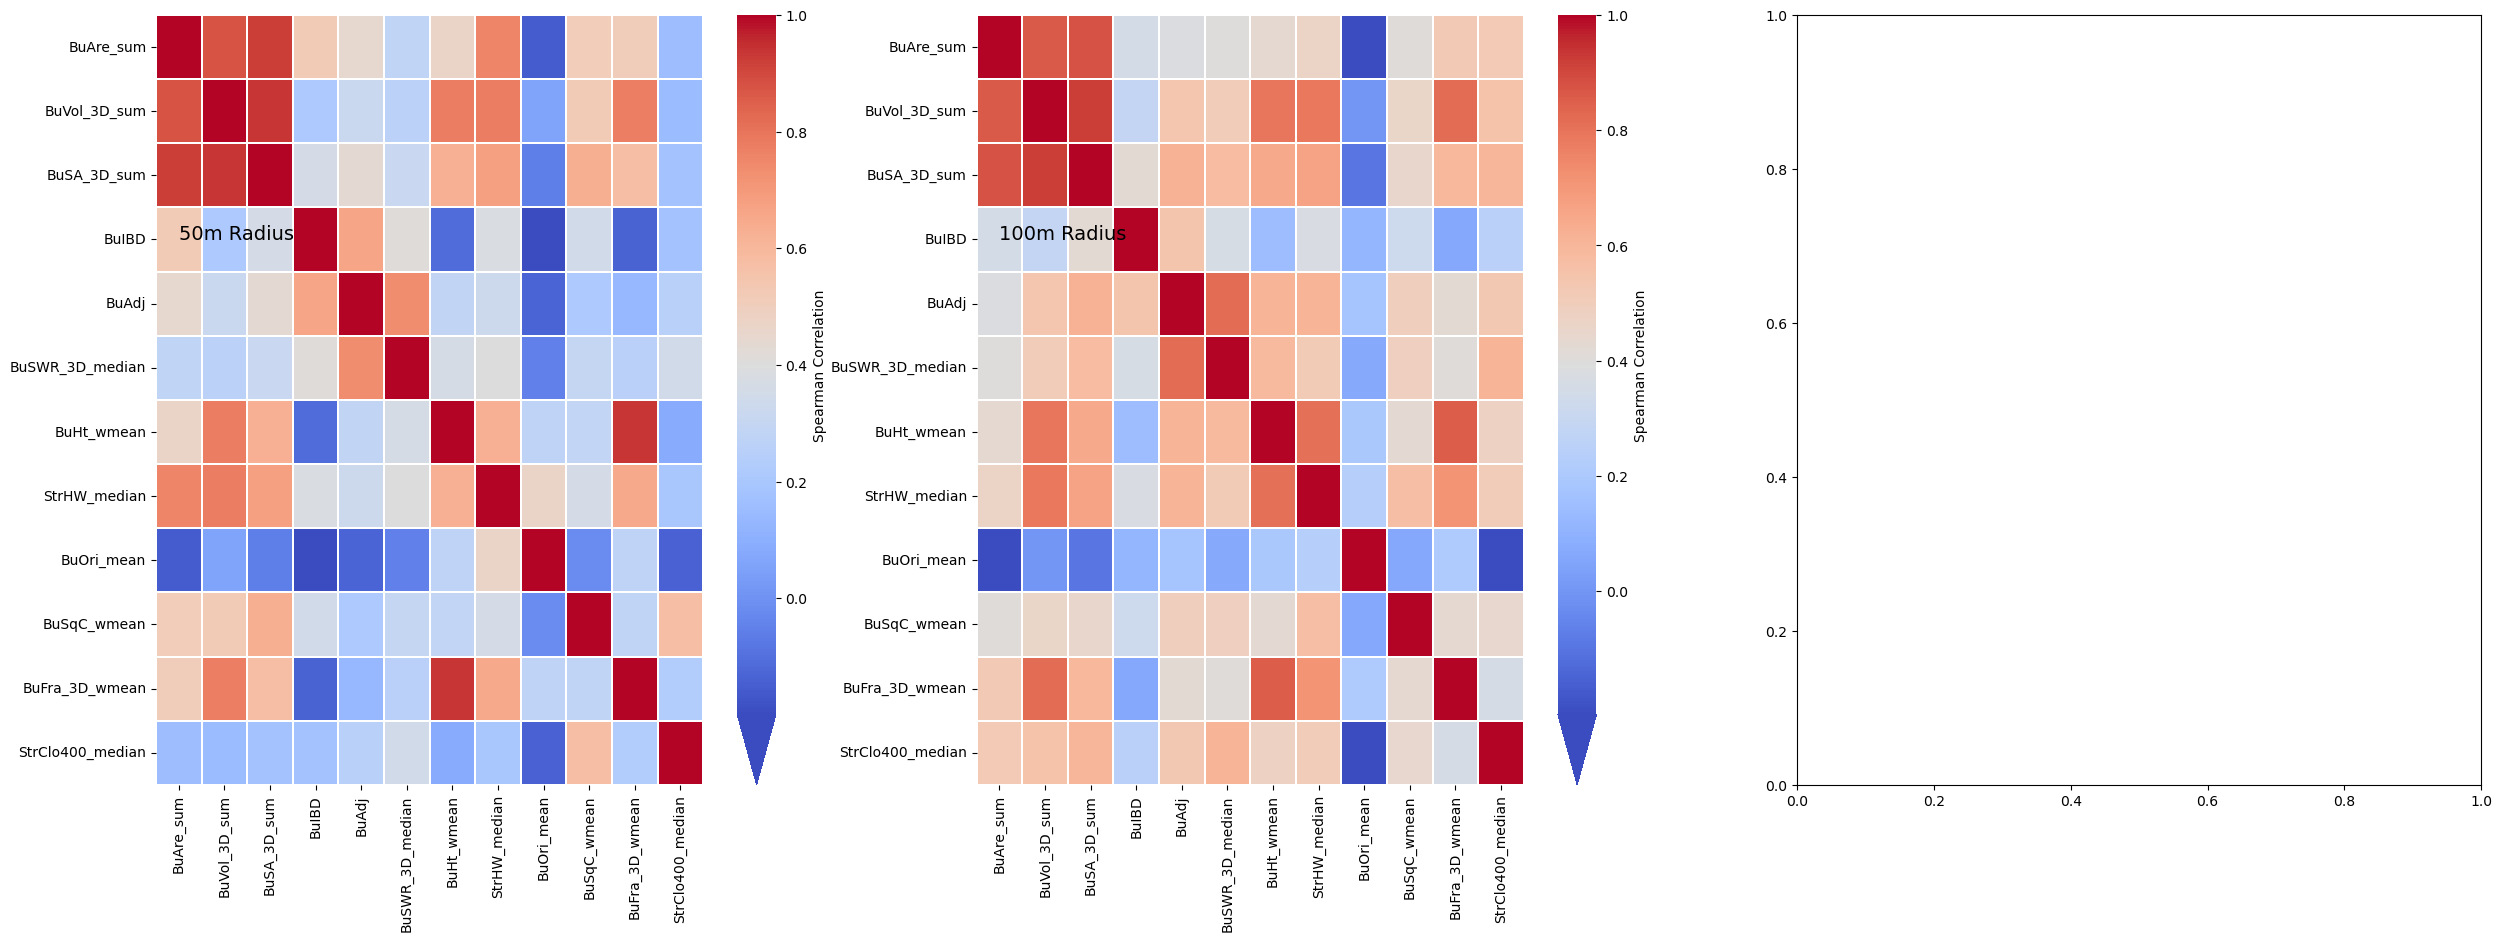

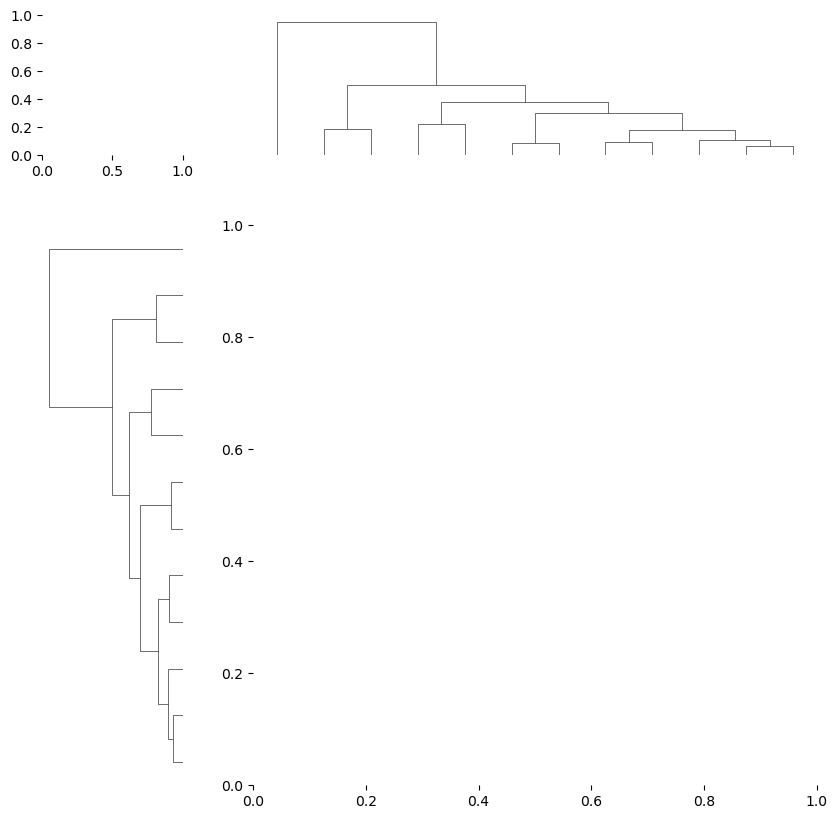

In [48]:
# call heatmap and clustergram funcitons to create 3 subplots
fig, axs = plt.subplots(1,3, figsize=(30,10))

# heatmap
corr_matrix_order(params, 50, ax = axs[0])
# clustergram
corr_matrix_order(params, 100, ax=axs[1])
# clustergram
corr_matrix(params, 200, ax = axs[2])

plt.show()

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


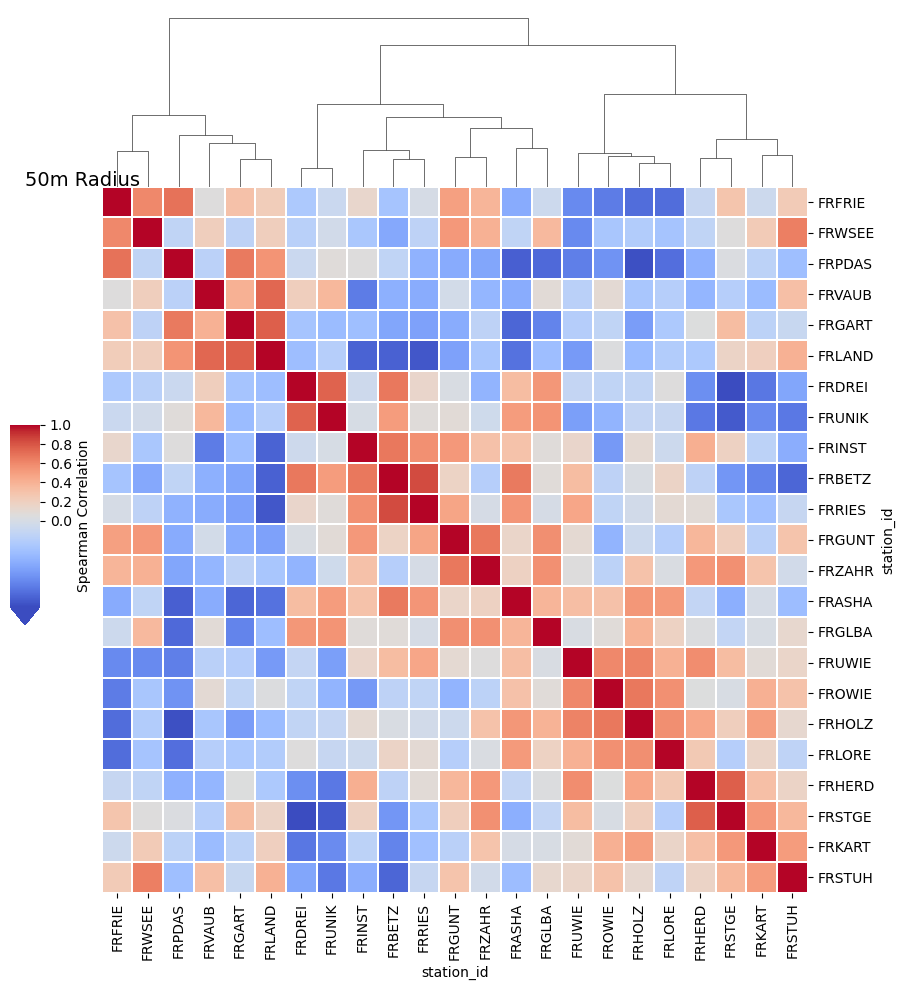

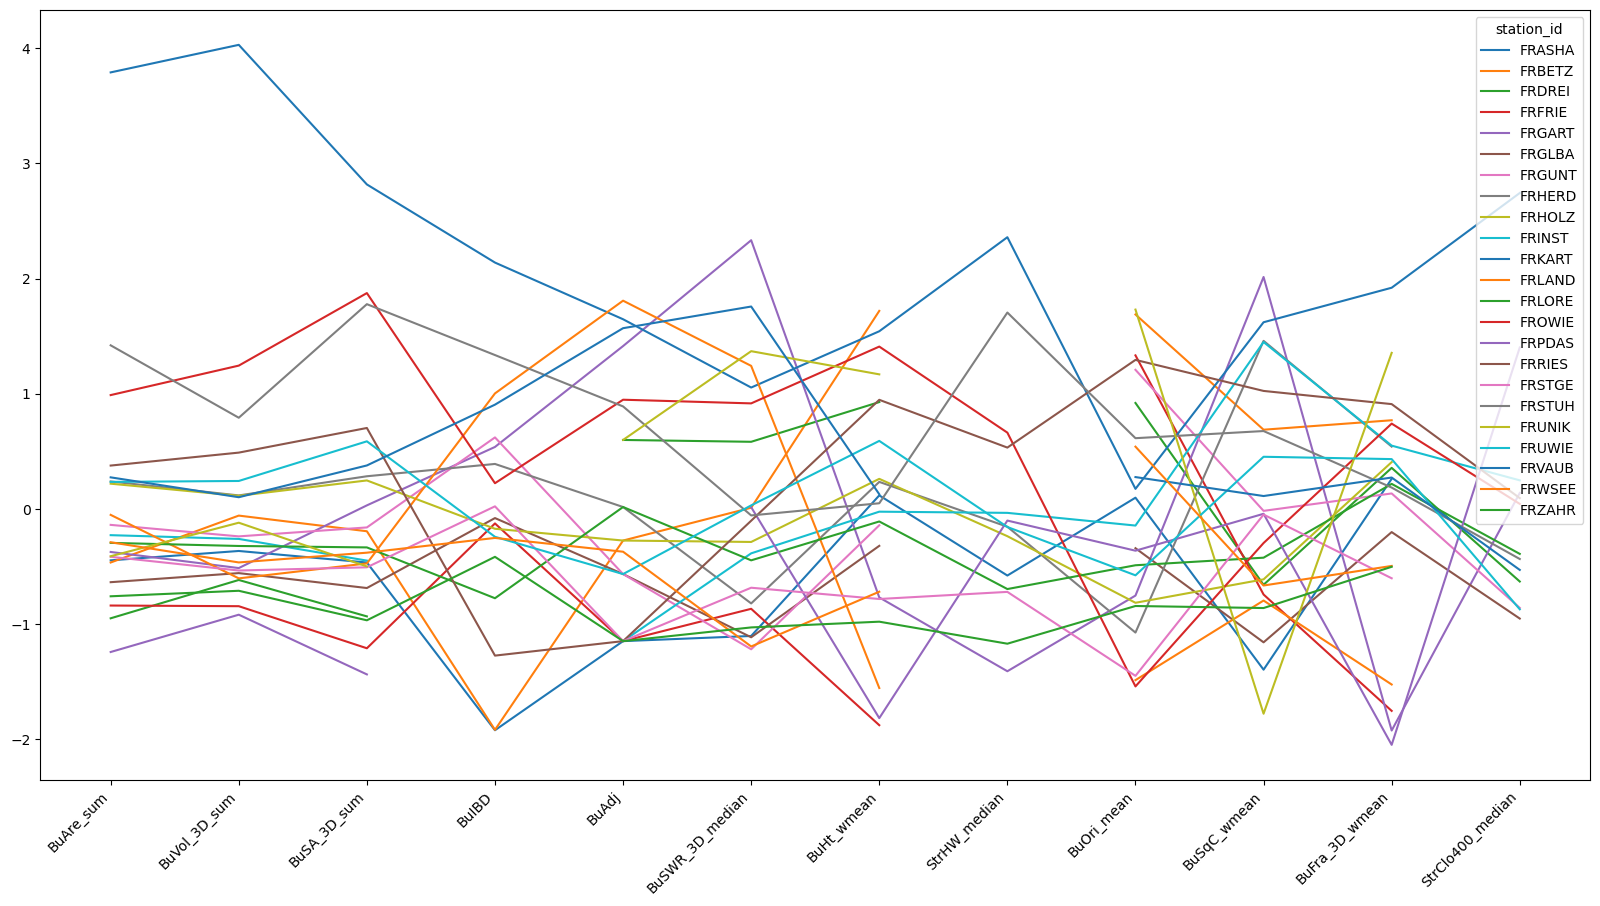

In [30]:
corr_matrix_station(params, 50)
    

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


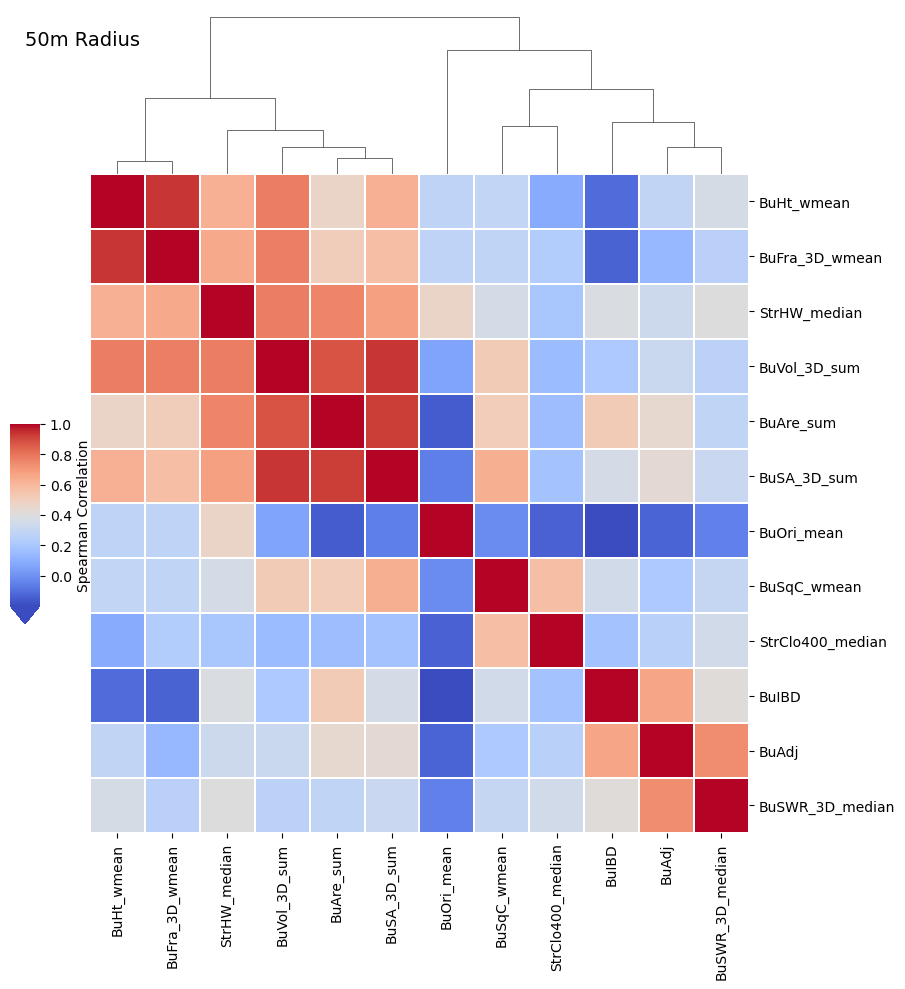

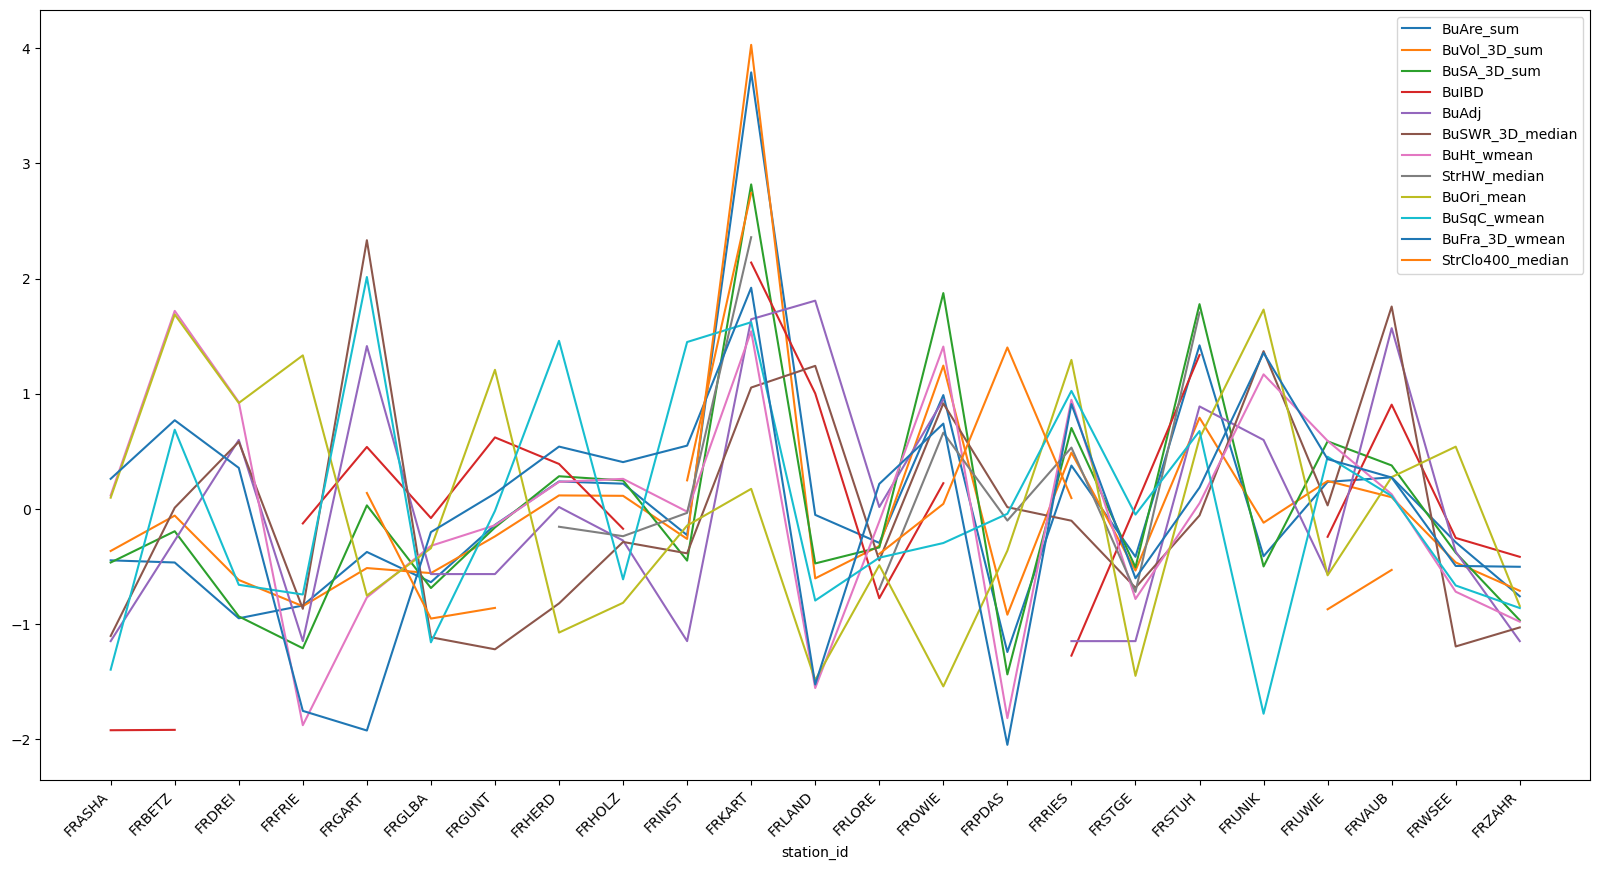

In [10]:
corr_matrix(params, 50)

In [40]:
params

['BuAre_sum',
 'BuVol_3D_sum',
 'BuSA_3D_sum',
 'BuIBD',
 'BuAdj',
 'BuSWR_3D_median',
 'BuHt_wmean',
 'StrHW_median',
 'BuOri_mean',
 'BuSqC_wmean',
 'BuFra_3D_wmean',
 'StrClo400_median']

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


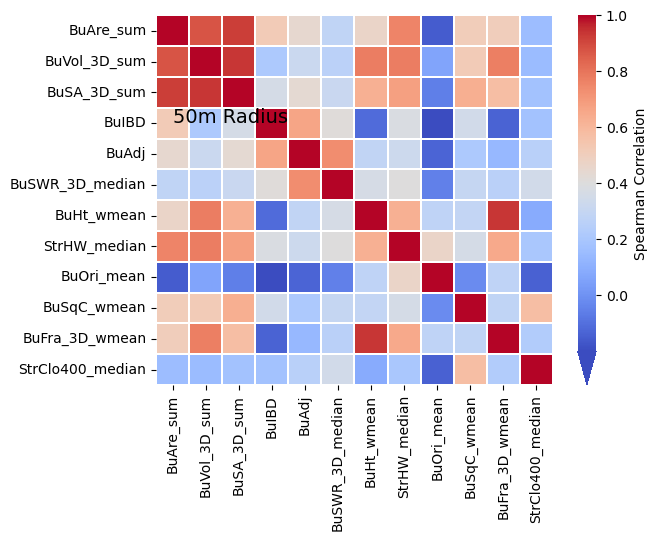

In [39]:
corr_matrix_order(params, 50)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


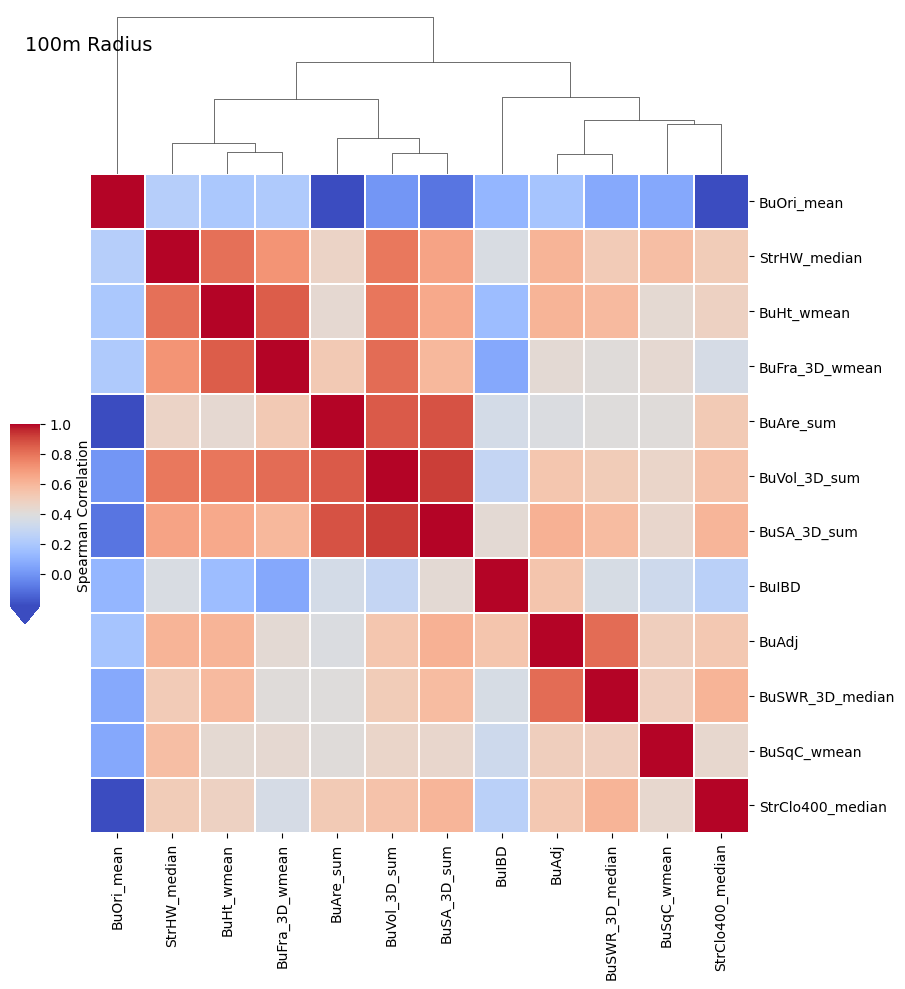

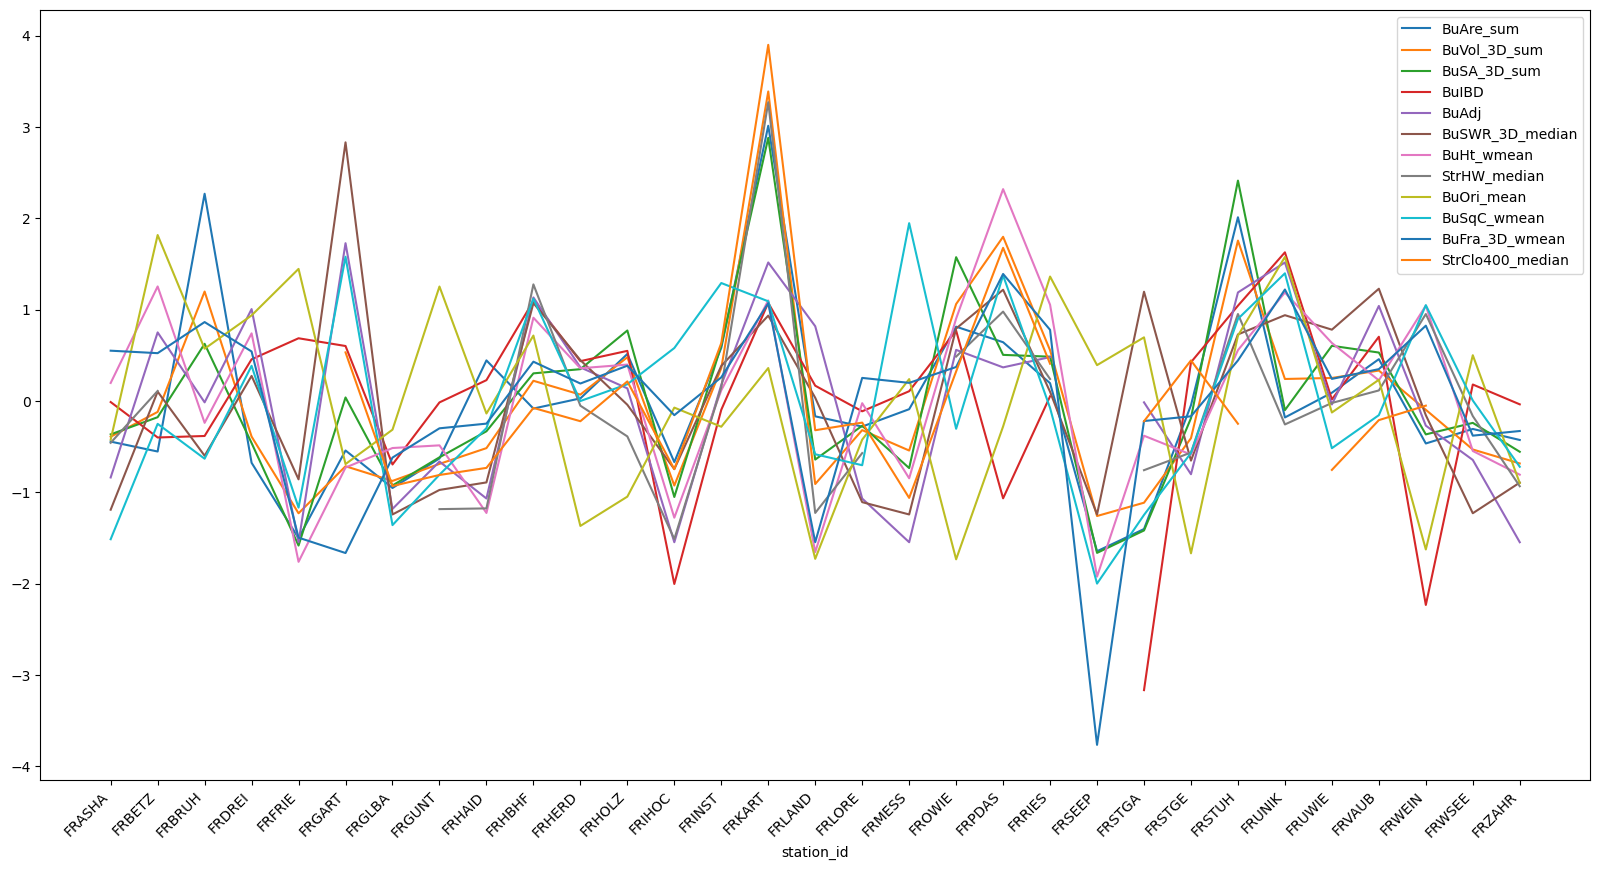

In [92]:
corr_matrix(params, 100)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


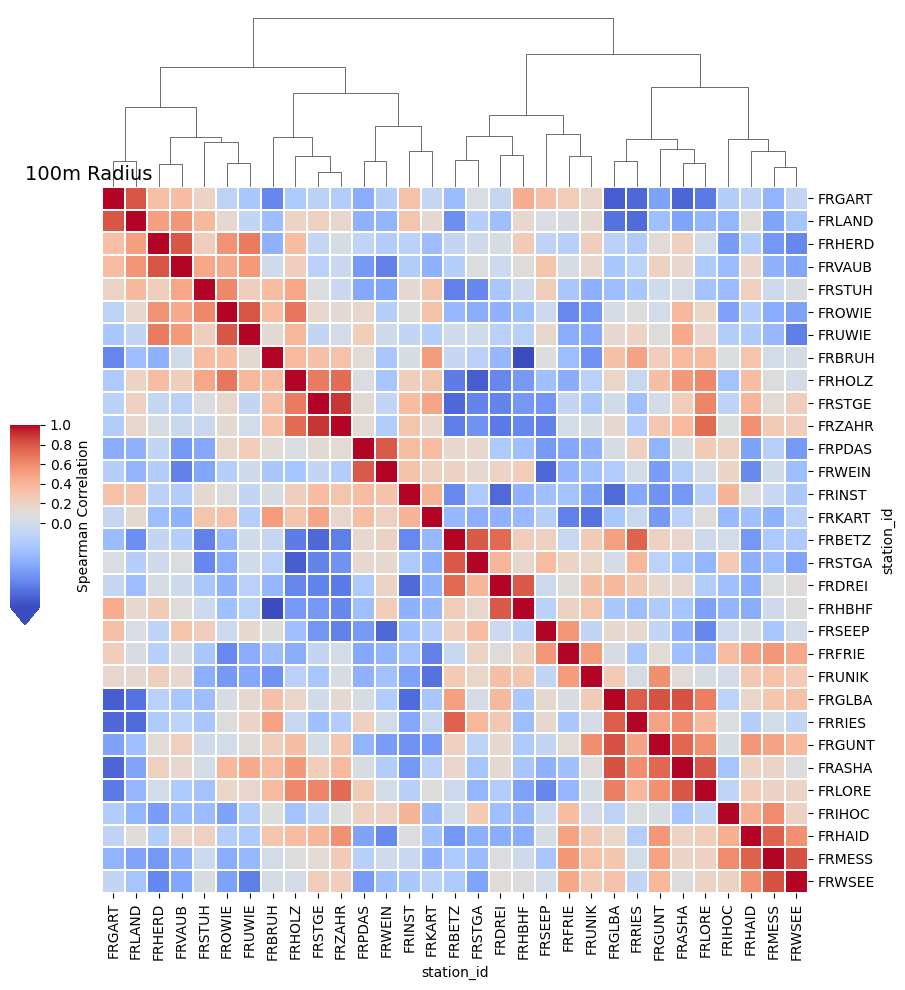

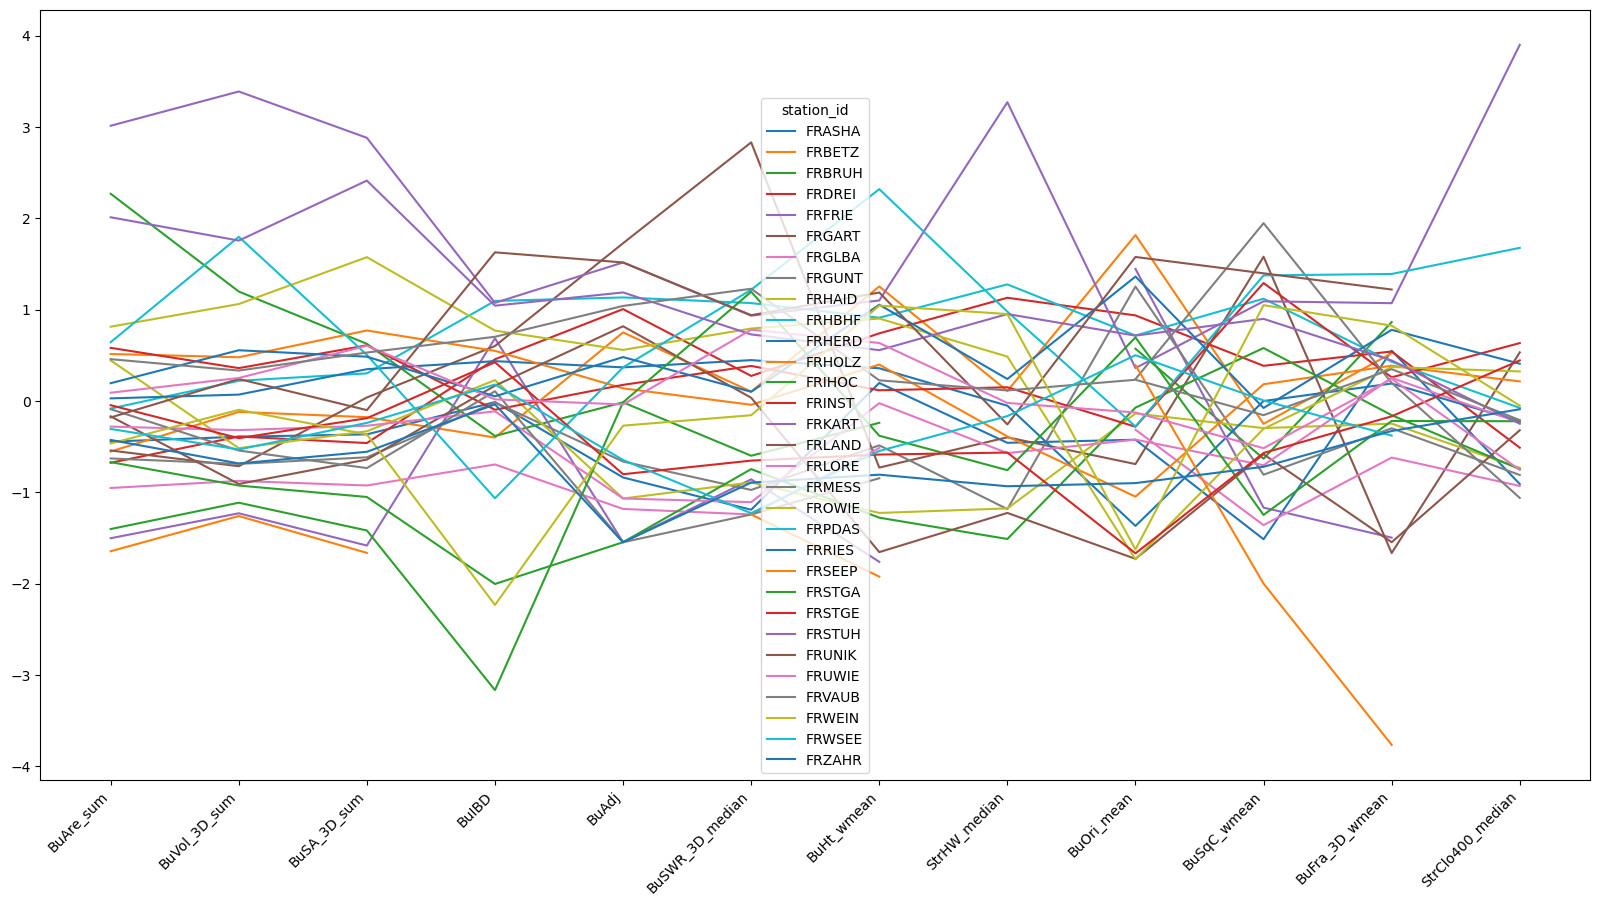

In [31]:
corr_matrix_station(params, 100)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


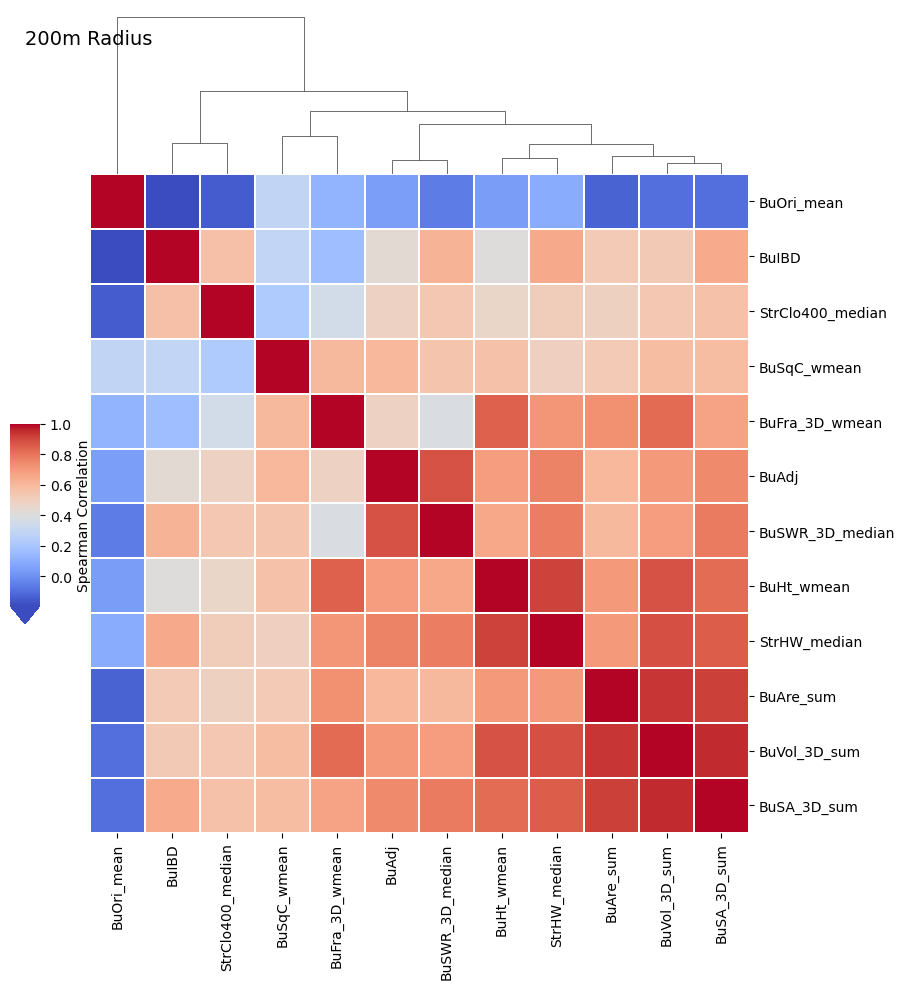

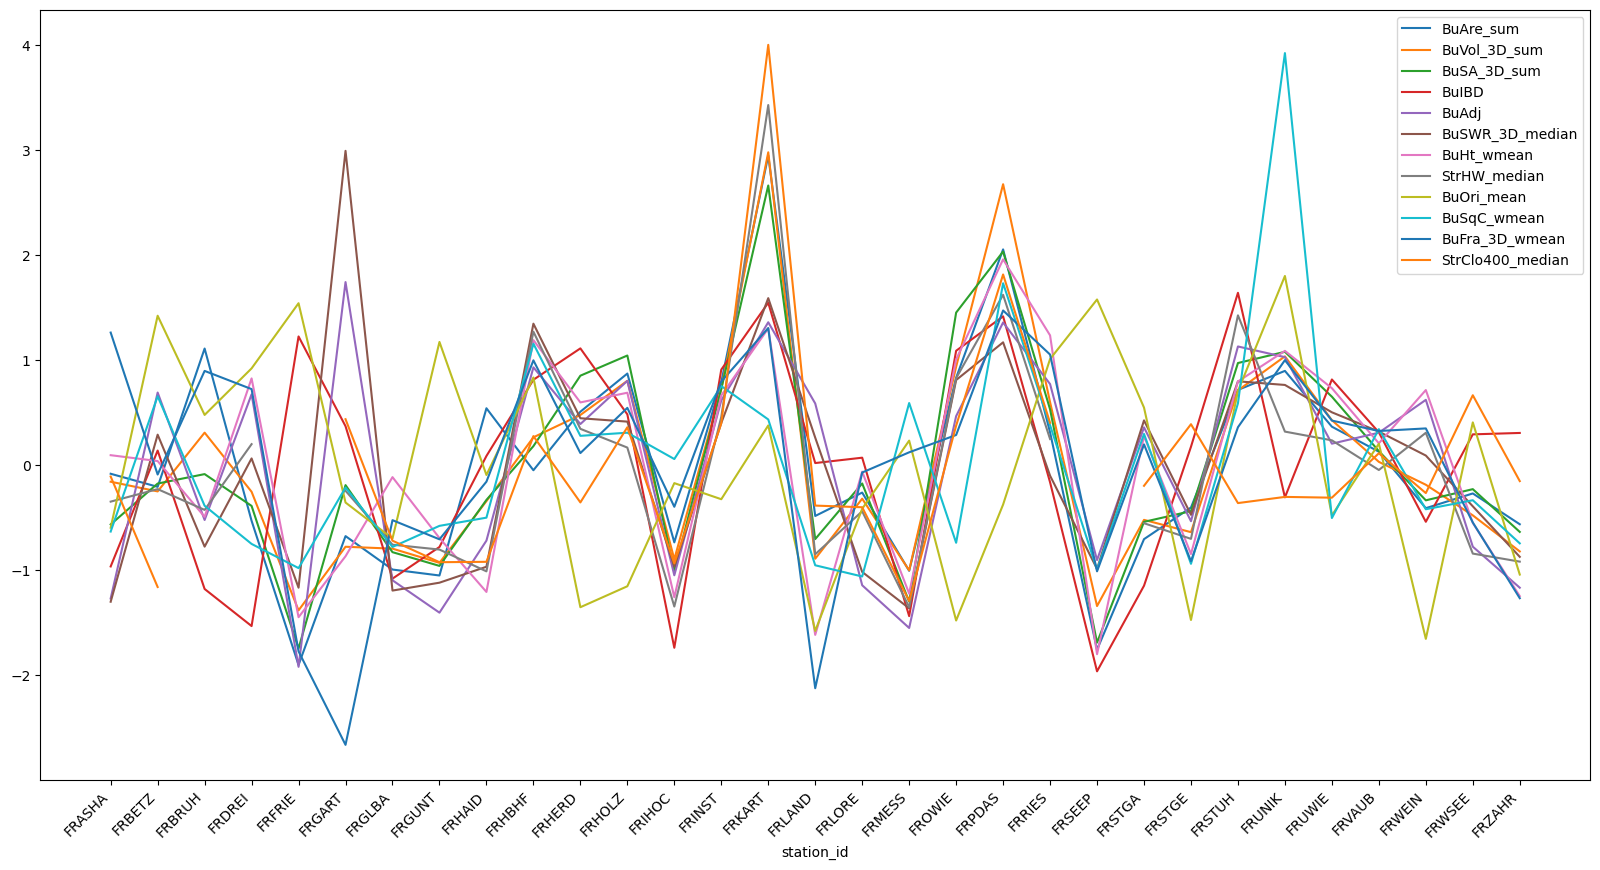

In [93]:
corr_matrix(params, 200)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


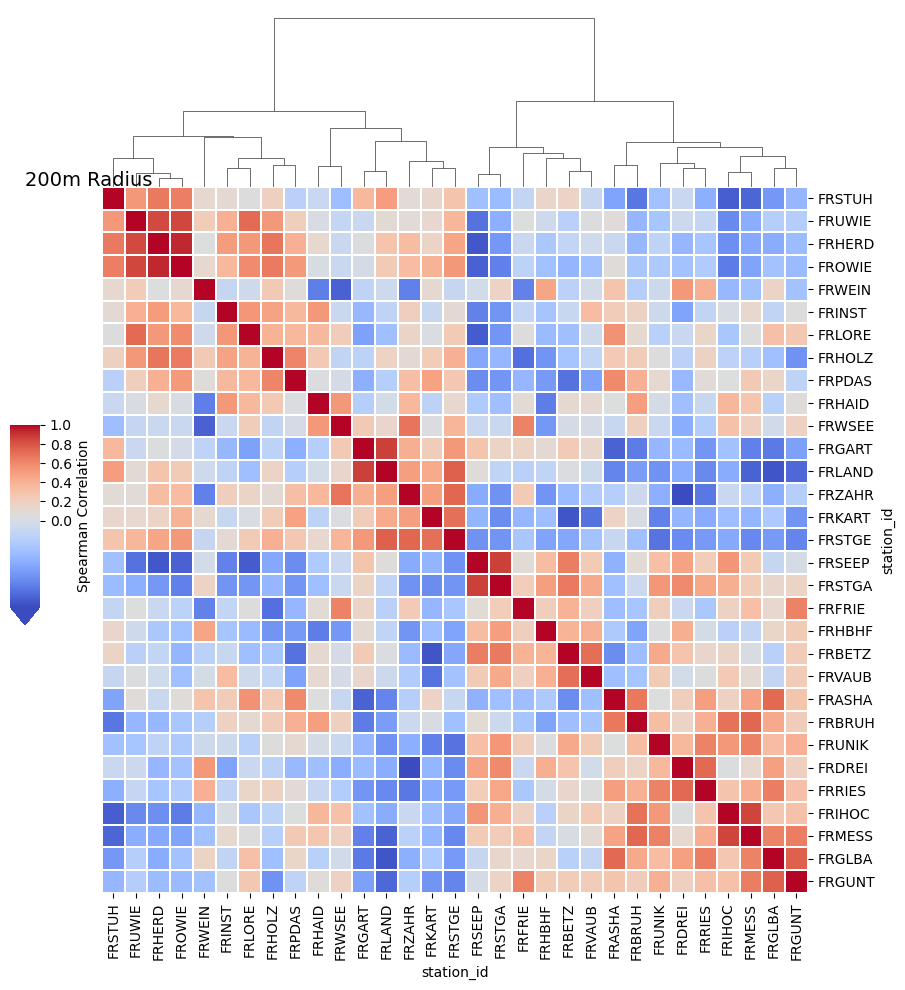

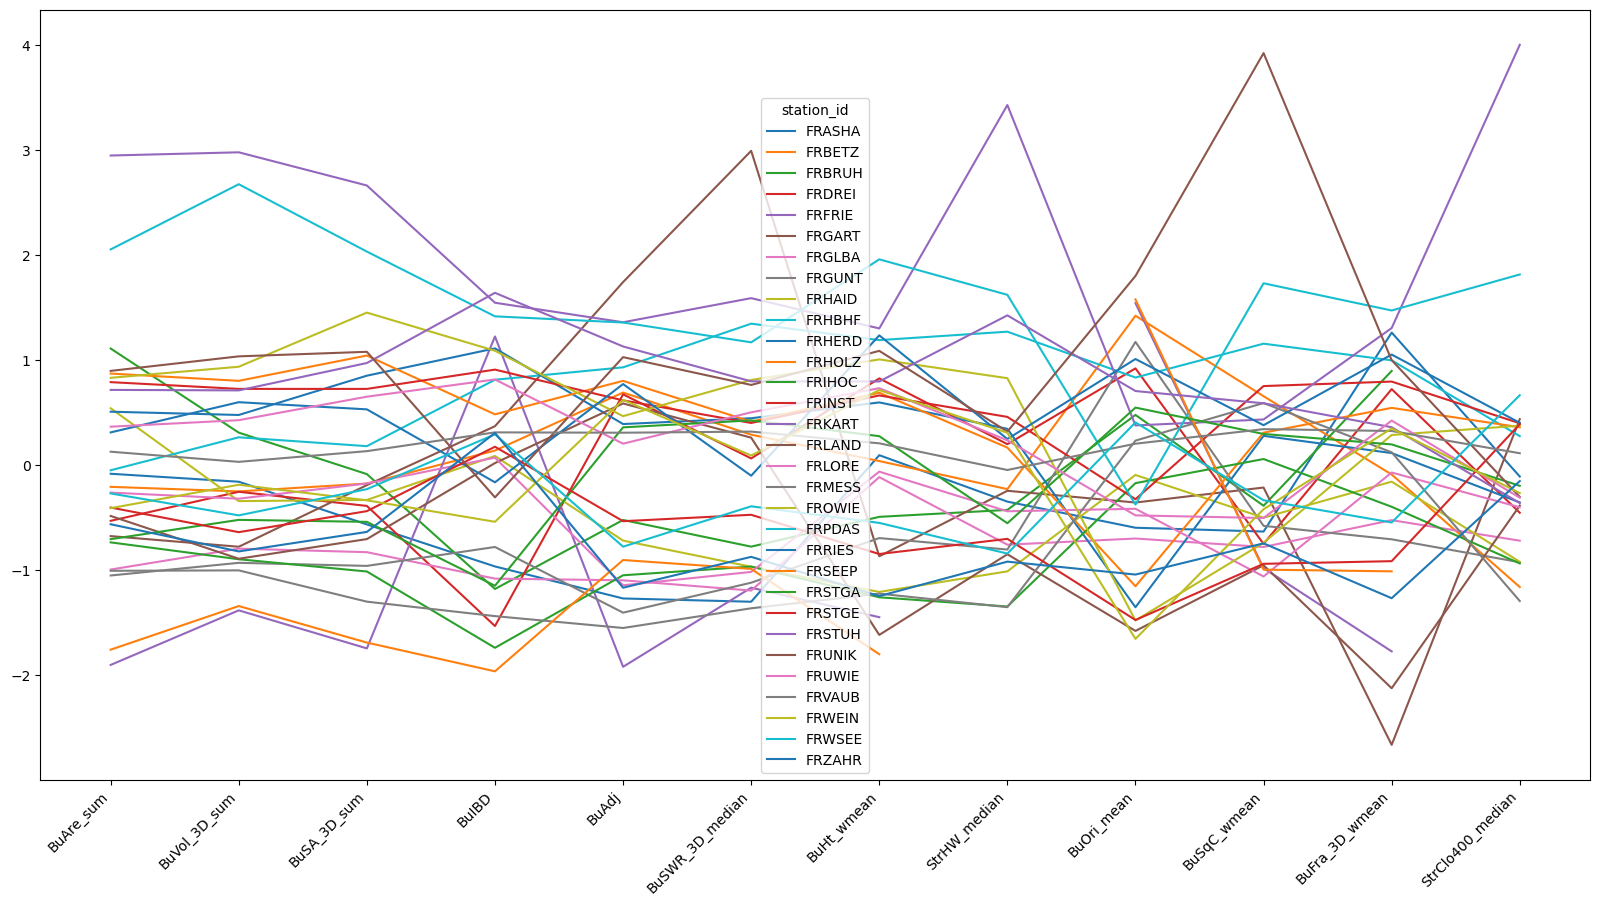

In [32]:
corr_matrix_station(params, 200)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


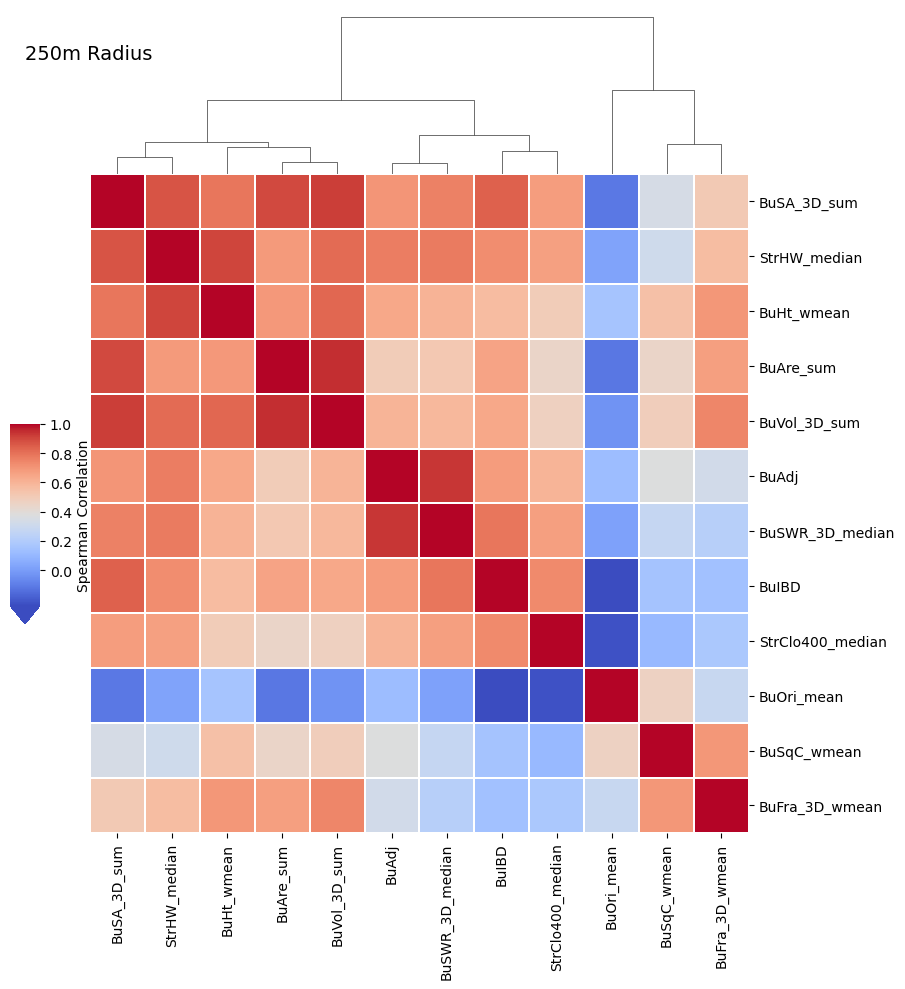

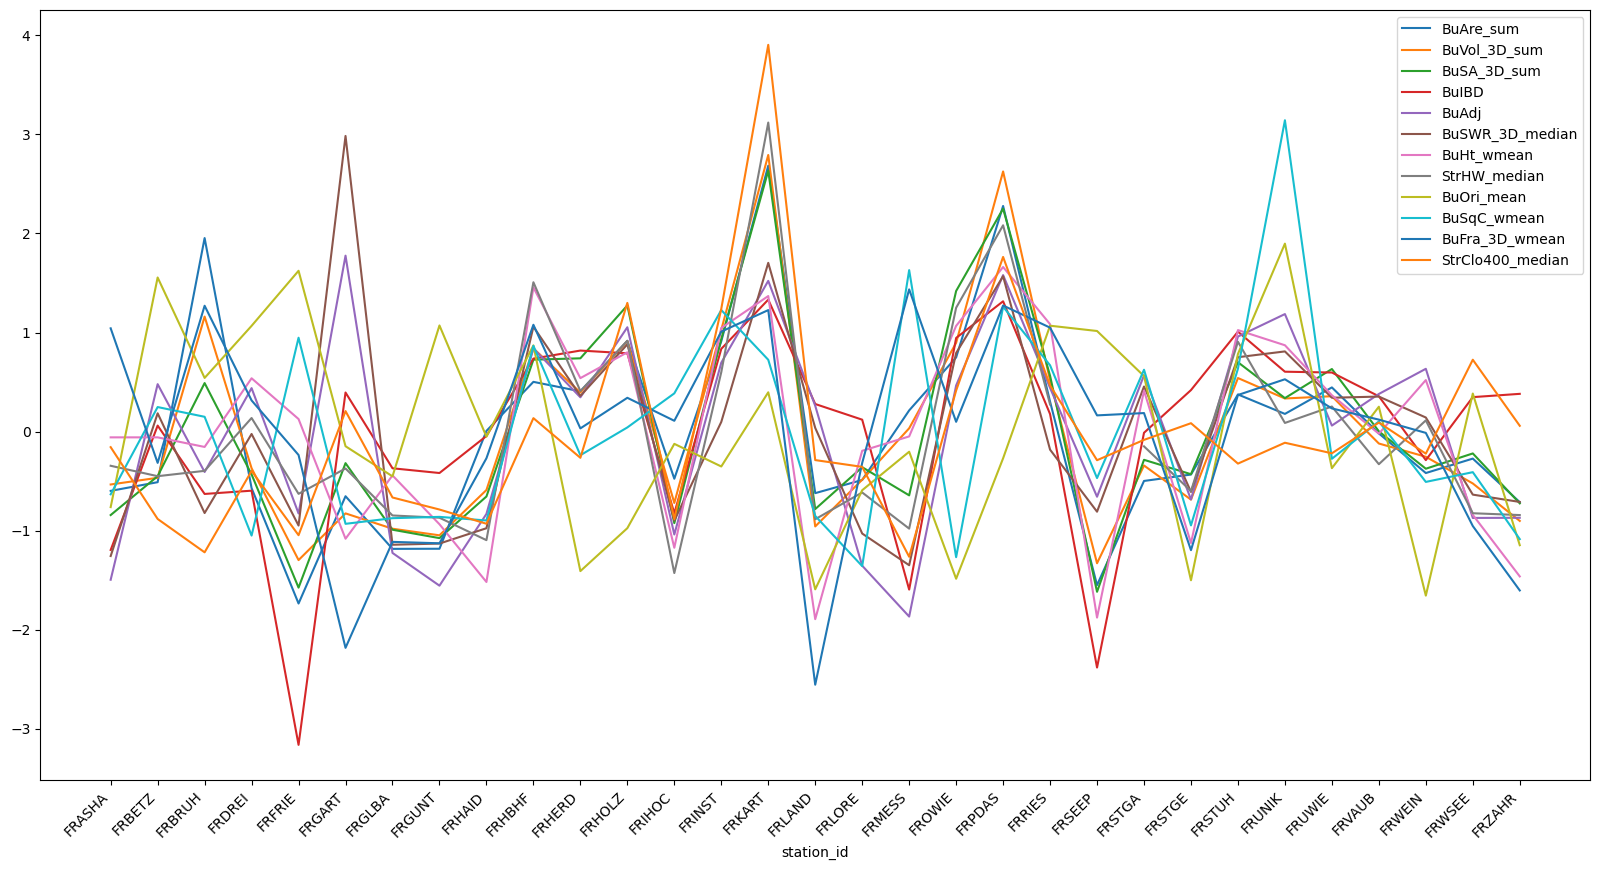

In [94]:
corr_matrix(params, 250)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


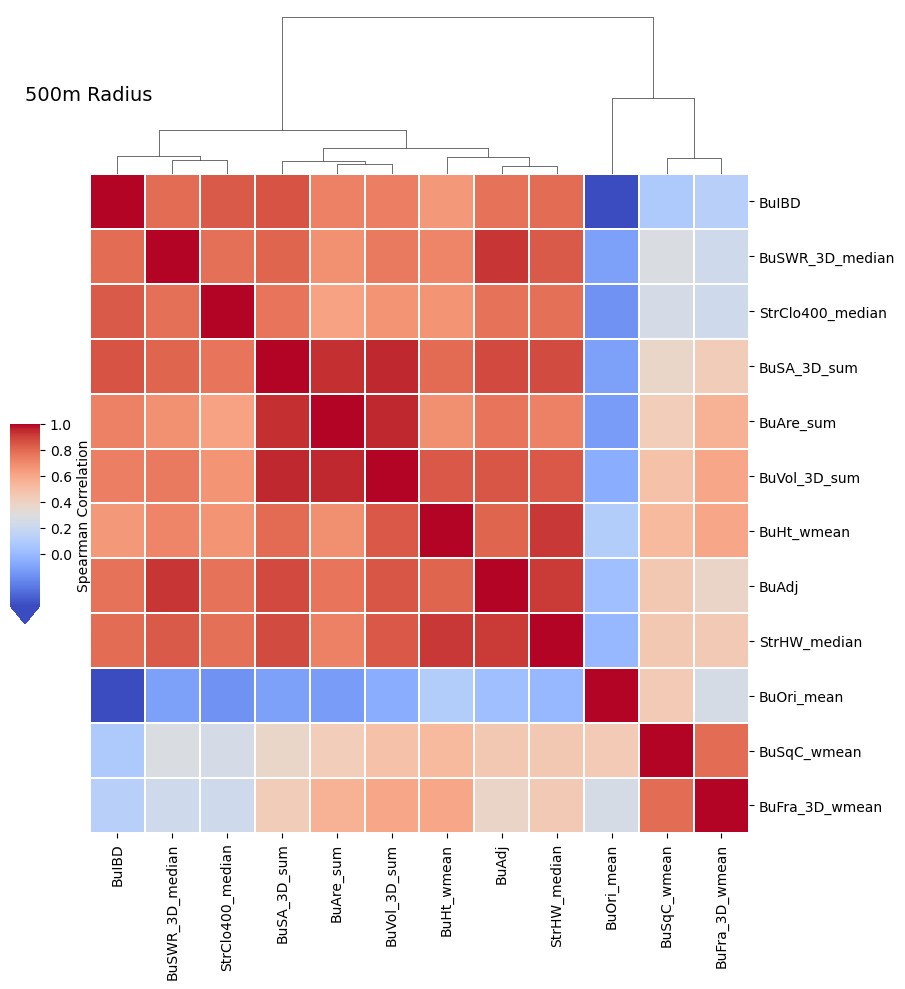

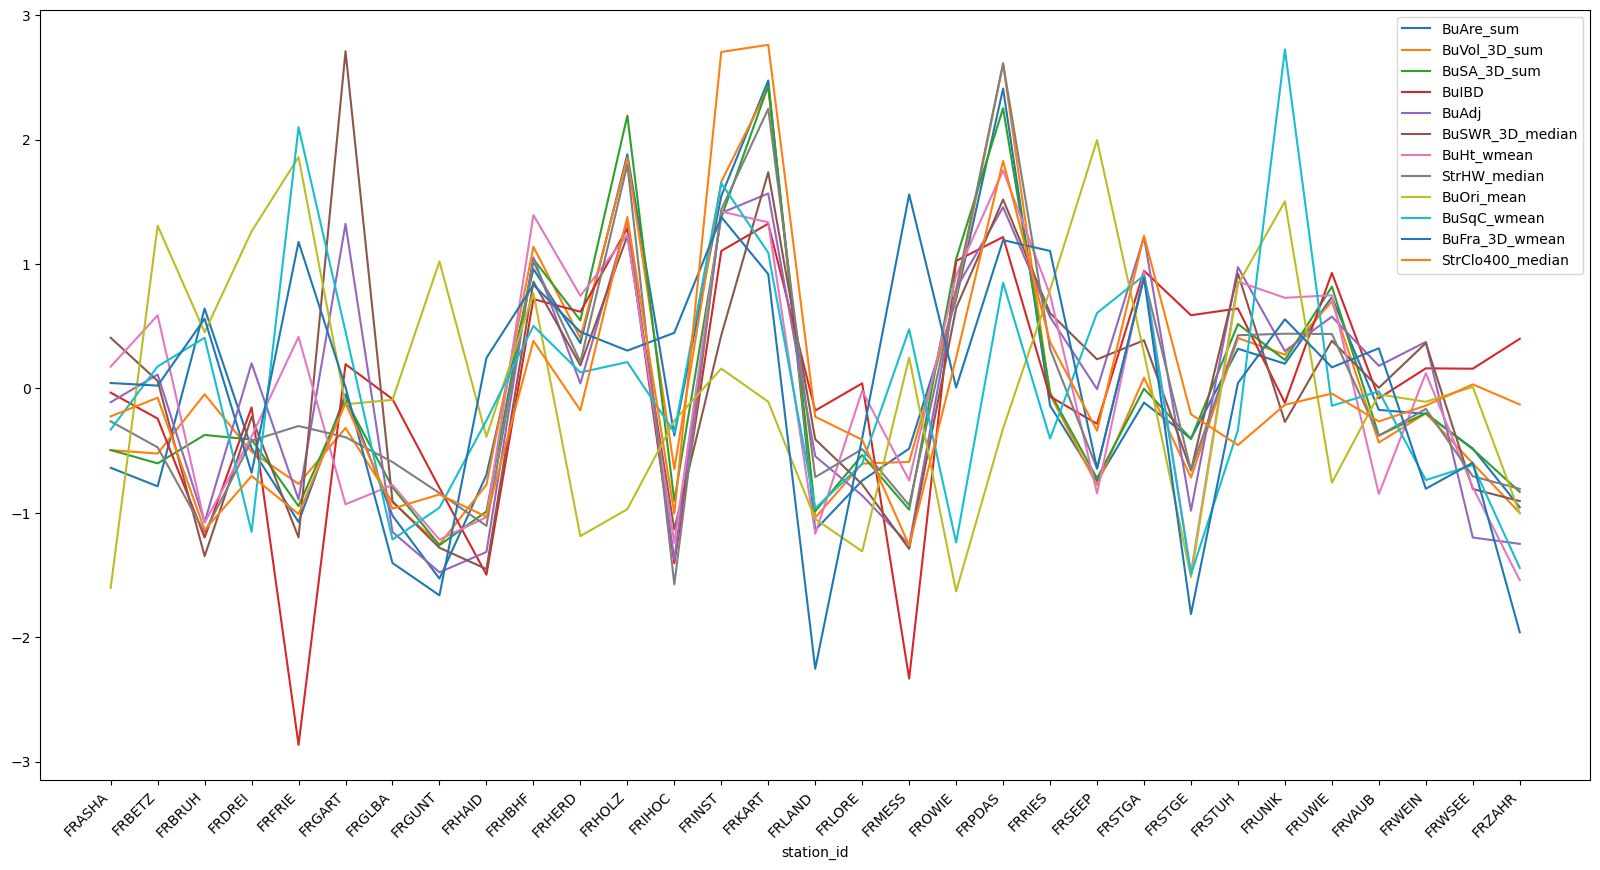

In [95]:
corr_matrix(params, 500)